In [1]:
from config import model_api

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import requests

## Input ticker and build query URLs

In [4]:
ticker = str(input("Enter Company Ticker: ")).upper()
period = str(input("Annual or Quarter: ")).lower()
incomeAnnual_url = f"https://financialmodelingprep.com/api/v3/income-statement/{ticker}?apikey={model_api}"
# get income statement data
incomeQuarter_url = f"https://financialmodelingprep.com/api/v3/income-statement/{ticker}?apikey={model_api}&period={period}&limit=100"

# get cash flow statement data
cashFlowQuarter_url = f"https://financialmodelingprep.com/api/v3/cash-flow-statement/{ticker}?apikey={model_api}&period={period}&limit=100"

# get balance sheet data
balanceSheet_url = f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{ticker}?period={period}&limit=400&apikey={model_api}"

# income statement growth numbers
incomeGrowthQuarter_url = f"https://financialmodelingprep.com/api/v3/income-statement-growth/{ticker}?limit=100&period={period}&apikey={model_api}"

# key stats investors look for
keyStats_url = f"https://financialmodelingprep.com/api/v3/profile/{ticker}?apikey={model_api}"

# key metrics
keyMetrics_url = f"https://financialmodelingprep.com/api/v3/key-metrics/{ticker}?period={period}&limit=100&apikey={model_api}"

# enterprise value
enterpriseValue_url = f"https://financialmodelingprep.com/api/v3/enterprise-values/{ticker}?period={period}&limit=100&apikey={model_api}"

# insider trading info
insider_url = f"https://financialmodelingprep.com/api/v4/insider-trading?symbol={ticker}&limit=100&apikey={model_api}"



Enter Company Ticker: lpcn
Annual or Quarter: annual


### TO BE ADDED TO VSCODE STREAMLIT

### Request for data in JSON formats

In [8]:
requests.get(incomeQuarter_url)

<Response [504]>

In [5]:
income_json = requests.get(incomeQuarter_url).json()
cashFlow_json = requests.get(cashFlowQuarter_url).json()
keyMetrics_json = requests.get(keyMetrics_url).json()
balance_json = requests.get(balanceSheet_url).json()
enterpriseValue_json = requests.get(enterpriseValue_url).json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
income_json[0]

In [128]:
keyStats_json = requests.get(keyStats_url).json()

## Competitor Analysis

In [47]:
# select company sector and indsutry and combine two words with underscores for web readability
company_sector = keyStats_json[0]['sector'].replace(" ", "_")
company_industry = keyStats_json[0]['industry'].replace(" ", "_")

# stock screener
stockScreen_url = f"https://financialmodelingprep.com/api/v3/stock-screener?sector={company_sector}&industry={company_industry}&limit=100&apikey={model_api}"


In [48]:
stockScreen_json = requests.get(stockScreen_url).json()

In [165]:
stockScreen_json[:5]

[{'symbol': 'TMO',
  'companyName': 'Thermo Fisher Scientific Inc',
  'marketCap': 189788979000,
  'sector': 'Healthcare',
  'industry': 'Diagnostics & Research',
  'beta': 1.00607,
  'price': 478.86,
  'lastAnnualDividend': 0.88,
  'volume': 1711255,
  'exchange': 'New York Stock Exchange',
  'exchangeShortName': 'NYSE',
  'country': 'US',
  'isEtf': False,
  'isActivelyTrading': True},
 {'symbol': 'DHR',
  'companyName': 'Danaher Corp',
  'marketCap': 164411638000,
  'sector': 'Healthcare',
  'industry': 'Diagnostics & Research',
  'beta': 0.87998,
  'price': 231.24,
  'lastAnnualDividend': 0.72,
  'volume': 2476952,
  'exchange': 'New York Stock Exchange',
  'exchangeShortName': 'NYSE',
  'country': 'US',
  'isEtf': False,
  'isActivelyTrading': True},
 {'symbol': 'ILMN',
  'companyName': 'Illumina Inc',
  'marketCap': 70945333000,
  'sector': 'Healthcare',
  'industry': 'Diagnostics & Research',
  'beta': 1.08199,
  'price': 486.26,
  'lastAnnualDividend': 0,
  'volume': 1134090,
 

In [63]:
# loop through competitor list and get the tickers
competitorTickers = [stockScreen_json[i]['symbol'] for i in range(len(stockScreen_json))]
# sort competitor list in alphebetical order
competitorTickers = sorted(competitorTickers)

In [64]:
competitorTickers[:5]

['A', 'ABAX', 'AKU', 'AKU.TO', 'ALBIO.PA']

In [65]:
def listToStrings(input_list):
    """
    This function turns a list of competitors into a comma separated string
    This string will be needed to request batch competitor info
    """
    # initialize empty string. join separated by comma
    some_str = ","
    return some_str.join(input_list)
listToStrings(competitorTickers)

'A,ABAX,AKU,AKU.TO,ALBIO.PA,ALERS.PA,ALMDT.PA,ALNOV.PA,ALOG,ANIX,ARA,AXDX,BASI,BCART.BR,BDSX,BEAT,BIM.PA,BIOC,BMRA,BNGO,BNR,BWAY,CDNA,CELC,CEMI,CHEK,CNTG,CO,CODX,CRL,CSTL,DGX,DHR,DMTK,DRIO,DXCM,EDT.TO,ENZ,ERF.PA,EXAS,FLDM,FLGT,FMI,GENE,GH,GHDX,HSKA,ICLR,IDXX,ILMN,IQV,ITUS,KANG,LBIRD.PA,LH,LNTH,MDXH.BR,MEDP,MOTS,MTD,MYGN,NDRA,NEO,NEOG,NRC,NRCIA,NRCIB,NTRA,NVTA,ONVO,OPGN,OPK,OXFD,PACB,PHG,PHIA.AS,PKI,PRAH,PRPO,PSNL,QDEL,QGEN,QTNT,RDNT,SENS,SHC,SLNO,SRDX,STIM,SYNH,SZLS.TO,TMO,TRIB,TTOO,TWST,VIVO,VNRX,VRML,WAT,XGN'

In [59]:
# potential competitors
competitors_string = listToStrings(competitorTickers)
# Batch request stock company info
competitor_url = f"https://financialmodelingprep.com/api/v3/quote/{competitors_string}?apikey={model_api}"

In [60]:
# request for data
competitor_json = requests.get(competitor_url).json()

In [66]:
competitor_json[:5]

[{'symbol': 'A',
  'name': 'Agilent Technologies, Inc.',
  'price': 126.87,
  'changesPercentage': -0.63,
  'change': -0.81,
  'dayLow': 126.49,
  'dayHigh': 128.895,
  'yearHigh': 136.98,
  'yearLow': 61.13,
  'marketCap': 38744702976.0,
  'priceAvg50': 124.852425,
  'priceAvg200': 110.43971,
  'volume': 1170890,
  'avgVolume': 1842940,
  'exchange': 'NYSE',
  'open': 128.41,
  'previousClose': 127.68,
  'eps': 2.597,
  'pe': 48.852524,
  'earningsAnnouncement': '2021-02-16T16:05:00.000+0000',
  'sharesOutstanding': 305389004,
  'timestamp': 1613887399},
 {'symbol': 'ABAX',
  'name': 'Abaxis, Inc.',
  'price': None,
  'changesPercentage': 0.0,
  'change': None,
  'dayLow': None,
  'dayHigh': None,
  'yearHigh': None,
  'yearLow': None,
  'marketCap': None,
  'priceAvg50': None,
  'priceAvg200': None,
  'volume': None,
  'avgVolume': None,
  'exchange': 'NASDAQ',
  'open': None,
  'previousClose': None,
  'eps': None,
  'pe': None,
  'earningsAnnouncement': '2018-04-26T20:01:02.000+000

In [67]:
for j in competitor_json:
    print(j)
    break

{'symbol': 'A', 'name': 'Agilent Technologies, Inc.', 'price': 126.87, 'changesPercentage': -0.63, 'change': -0.81, 'dayLow': 126.49, 'dayHigh': 128.895, 'yearHigh': 136.98, 'yearLow': 61.13, 'marketCap': 38744702976.0, 'priceAvg50': 124.852425, 'priceAvg200': 110.43971, 'volume': 1170890, 'avgVolume': 1842940, 'exchange': 'NYSE', 'open': 128.41, 'previousClose': 127.68, 'eps': 2.597, 'pe': 48.852524, 'earningsAnnouncement': '2021-02-16T16:05:00.000+0000', 'sharesOutstanding': 305389004, 'timestamp': 1613887399}


## Income Statement Analysis

In [6]:
# create a funciton that outputs all financial statement information
def createIncomeStatement(incomeStatement_file):
    """
    THIS FUNCTION CREATES A DATAFRAME FROM INCOME STATEMENT DATA
    """
    for i in range(len(incomeStatement_file)):
        # define the rows for the DataFrame
        rows = ["Revenue",
                "Revenue Growth",
                "Cost of Revenue",
                "Gross Profit",
                'Operating Margin', 
                "Operating Income/Loss", 
                "Operating Income/Loss Growth",                  
                "Net Income",
               "Net Margin"]

        # determine revenue
        revenue = incomeStatement_file[i]['revenue'] / 1000
        # determine revenue growth
        try:
            revenuePreviousQuarter = incomeStatement_file[i+1]['revenue'] / 1000
            revenueGrowth = (revenue - revenuePreviousQuarter) / revenuePreviousQuarter
        except IndexError:
            revenueGrowth = np.nan
        except ZeroDivisionError:
            revenueGrowth = np.nan
        # determine cost of revenue
        costRevenue = incomeStatement_file[i]['costOfRevenue'] / 1000
        # determine gross profit
        gross_profit = incomeStatement_file[i]['grossProfit'] / 1000
        # determine operating expenses
        operating_expenses = incomeStatement_file[i]['operatingExpenses'] / 1000
        # determine net income
        net_income = incomeStatement_file[i]['netIncome'] / 1000
        # calculate operating income
        operating_income = gross_profit - operating_expenses
        # operating income growth
        try:
            grossProfitPreviousQuarter = incomeStatement_file[i+1]['grossProfit'] / 1000
            operatingExpensesPreviousQuarter = incomeStatement_file[i+1]['operatingExpenses'] / 1000
            operatingIncomePreviousQuarter = grossProfitPreviousQuarter - operatingExpensesPreviousQuarter
            operating_income_growth = (operating_income - operatingIncomePreviousQuarter) / operatingIncomePreviousQuarter
        except IndexError:
            operating_income_growth = np.nan
        except ZeroDivisionError:
            operating_income_growth = np.nan
        
        # calculate operating margin if revenue is greater than 0
        try:
            operating_margin = operating_income / revenue
        except ZeroDivisionError:
            operating_margin = np.nan
            
        # Calculate net margin
        try:
            netMargin = net_income / revenue
        except ZeroDivisionError:
            netMargin = np.nan
        
        
        # create a dataframe on the first iteration and add new columns on the rest 
        if i == 0:
            df = pd.DataFrame({incomeStatement_file[i]['date']: [revenue,
                                                                 revenueGrowth,
                                                                 costRevenue,
                                                                 gross_profit,
                                                                 operating_margin, 
                                                                 operating_income,
                                                                 operating_income_growth,                                                               
                                                                 net_income,
                                                                 netMargin]}, 
                                                         index=rows)
        else:
            df[incomeStatement_file[i]['date']] = [revenue,
                                                   revenueGrowth,
                                                   costRevenue,
                                                   gross_profit,
                                                   operating_margin, 
                                                   operating_income,
                                                   operating_income_growth,                                                   
                                                   net_income,
                                                   netMargin]
    # display company ticker as index title
    df.index.name = f"{incomeStatement_file[0]['symbol']} (in thousands)"

    return df

In [9]:
createIncomeStatement(income_json)

,2020-09-30,2020-06-30,2020-03-31,2019-12-31,2019-09-30
LPCN (in thousands),,,,,
Revenue,0.000000,0.000000,0.00000,0.000000,164.990000
Revenue Growth,NaN,NaN,NaN,-1.000000,NaN
Cost of Revenue,2487.861000,2268.984000,2511.75400,1841.327000,1713.417000
Gross Profit,-2487.861000,-2268.984000,-2511.75400,-1841.327000,-1548.427000
Operating Margin,NaN,NaN,NaN,NaN,-18.035566
Operating Income/Loss,-4375.056000,-4222.519000,-4597.01500,-3448.752000,-2975.688000
Operating Income/Loss Growth,0.036125,-0.081465,0.33295,0.158976,NaN
Net Income,-4313.258000,-6369.634000,-5770.65100,-3292.075000,-3060.200000
Net Margin,NaN,NaN,NaN,NaN,-18.547791


## Cashflow statement analysis

In [31]:
cashFlow_json[0]

{'date': '2020-09-26',
 'symbol': 'AAPL',
 'reportedCurrency': 'USD',
 'fillingDate': '2020-10-30',
 'acceptedDate': '2020-10-29 18:06:25',
 'period': 'FY',
 'netIncome': 57411000000,
 'depreciationAndAmortization': 11056000000,
 'deferredIncomeTax': -215000000,
 'stockBasedCompensation': 6829000000,
 'changeInWorkingCapital': 5690000000,
 'accountsReceivables': 6917000000,
 'inventory': -127000000,
 'accountsPayables': -4062000000,
 'otherWorkingCapital': 1409000000,
 'otherNonCashItems': -97000000,
 'netCashProvidedByOperatingActivities': 80674000000,
 'investmentsInPropertyPlantAndEquipment': 0,
 'acquisitionsNet': 0,
 'purchasesOfInvestments': -115148000000,
 'salesMaturitiesOfInvestments': 120483000000,
 'otherInvestingActivites': -791000000,
 'netCashUsedForInvestingActivites': 0,
 'debtRepayment': -12629000000,
 'commonStockIssued': 880000000,
 'commonStockRepurchased': -72358000000,
 'dividendsPaid': -14081000000,
 'otherFinancingActivites': -3760000000,
 'netCashUsedProvidedBy

In [32]:
[cashFlow_json[div]['dividendsPaid'] for div in range(len(cashFlow_json))]   

[-14081000000,
 -14119000000,
 -13712000000,
 -12769000000,
 -12150000000,
 -11561000000,
 -11126000000,
 -10564000000,
 -2488000000,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -14000000,
 -58000000,
 -56572000,
 -55600000,
 -57200000,
 -56500000,
 -53800000,
 -50300000]

In [33]:
## CASH FLOW STATEMENT

# Create a function that creates the cash flow statement
def createCashFlowStatement(cashFlow_file):
    """
    This function creates a dataframe with key information from the cash flow statement
    """
    # find whether the company pays a dividend
    dividend_list = [cashFlow_file[div]['dividendsPaid'] for div in range(len(cashFlow_file))]        
        
    for num in range(len(cashFlow_file)):        
        # define the index for the dataframe
        # add a dividend row if the company pays a dividend
        if sum(dividend_list) != 0:
            cashRows = ["cash from operating activities",
                   "cash used for investing activities",
                   "cash used provided by financing activities",
                   "acquisitions",
                   "purchase of investments",
                   "sales maturities of investments",
                   "net change in cash",
                   "FREE CASH FLOW",
                    "dividends paid",
                    "debt repayments",
                   "common stock repurchased"]        
        else: 
            cashRows = ["cash from operating activities",
                       "cash used for investing activities",
                       "cash used provided by financing activities",
                       "acquisitions",
                       "purchase of investments",
                       "sales maturities of investments",
                       "net change in cash",
                       "FREE CASH FLOW",
                        "debt repayments",
                       "common stock repurchased"]
        cashOperatingActivities = cashFlow_file[num]['netCashProvidedByOperatingActivities'] / 1000 
        cashInvestingActivities = cashFlow_file[num]['netCashUsedForInvestingActivites'] / 1000
        cashFinancingActivities = cashFlow_file[num]['netCashUsedProvidedByFinancingActivities'] / 1000
        acquisitions = cashFlow_file[num]['acquisitionsNet'] / 1000
        purchaseInvestments = cashFlow_file[num]['purchasesOfInvestments'] / 1000
        investmentMaturities = cashFlow_file[num]['salesMaturitiesOfInvestments'] / 1000
        changeCash = cashFlow_file[num]['netChangeInCash'] / 1000
        freeCashFlow = cashFlow_file[num]['freeCashFlow'] / 1000
        stockRepurchase = cashFlow_file[num]['commonStockRepurchased'] / 1000
        # Debt repayments
        debtRepayments = cashFlow_file[num]['debtRepayment'] / 1000
        # dividend data
        dividend = cashFlow_file[num]['dividendsPaid'] / 1000

        # do this if the company doesn't pay a dividend
        if sum(dividend_list) == 0:
            # create a dataframe on the first iteration and add new columns on the rest 
            if num == 0: 
                df = pd.DataFrame({cashFlow_file[num]['date']: [cashOperatingActivities,
                                                    cashInvestingActivities,
                                                    cashFinancingActivities,
                                                    acquisitions,
                                                    purchaseInvestments,
                                                    investmentMaturities,
                                                    changeCash,
                                                    freeCashFlow,
                                                    debtRepayments,
                                                    stockRepurchase]}, 
                                                 index=cashRows)

            else:
                df[cashFlow_file[num]['date']] = [cashOperatingActivities,
                                                    cashInvestingActivities,
                                                    cashFinancingActivities,
                                                    acquisitions,
                                                    purchaseInvestments,
                                                    investmentMaturities,
                                                    changeCash,
                                                    freeCashFlow,
                                                    debtRepayments,
                                                    stockRepurchase]
        # this dataframe will include a DIVIDENDS row
        else:
            if num == 0: 
                df = pd.DataFrame({cashFlow_file[num]['date']: [cashOperatingActivities,
                                                    cashInvestingActivities,
                                                    cashFinancingActivities,
                                                    acquisitions,
                                                    purchaseInvestments,
                                                    investmentMaturities,
                                                    changeCash,
                                                    freeCashFlow,
                                                    dividend,
                                                    debtRepayments,
                                                    stockRepurchase]}, 
                                                 index=cashRows)

            else:
                df[cashFlow_file[num]['date']] = [cashOperatingActivities,
                                                    cashInvestingActivities,
                                                    cashFinancingActivities,
                                                    acquisitions,
                                                    purchaseInvestments,
                                                    investmentMaturities,
                                                    changeCash,
                                                    freeCashFlow,
                                                    dividend,
                                                    debtRepayments,
                                                    stockRepurchase]
            
    # display company ticker as index title
    df.index.name = f"{cashFlow_file[0]['symbol']} (in thousands)"
    
    return df

In [34]:
createCashFlowStatement(cashFlow_json)

,2020-09-26,2019-09-28,2018-09-29,2017-09-30,2016-09-24,2015-09-26,2014-09-27,2013-09-28,2012-09-29,2011-09-24,...,1998-09-25,1997-09-26,1996-09-27,1995-09-29,1994-09-30,1993-09-30,1992-09-30,1991-09-30,1990-09-30,1989-09-30
AAPL (in thousands),,,,,,,,,,,,,,,,,,,,,
cash from operating activities,80674000.0,69391000.0,77434000.0,63598000.0,66231000.0,81266000.0,59713000.0,53666000.0,50856000.0,37529000.0,...,775000.0,188000.0,519000.0,-240000.0,736995.0,-661800.0,883700.0,128700.0,963900.0,507300.0
cash used for investing activities,0.0,0.0,16066000.0,0.0,-45977000.0,-56274000.0,-22579000.0,-33774000.0,-48227000.0,-40419000.0,...,-543000.0,-533000.0,-119000.0,-402000.0,0.0,0.0,0.0,0.0,0.0,0.0
cash used provided by financing activities,0.0,0.0,-87876000.0,0.0,-20890000.0,-17716000.0,-37549000.0,-16379000.0,-1698000.0,1444000.0,...,19000.0,23000.0,396000.0,195000.0,0.0,0.0,0.0,0.0,0.0,0.0
acquisitions,0.0,0.0,-721000.0,0.0,-297000.0,-343000.0,-3765000.0,-496000.0,-350000.0,-244000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
purchase of investments,-115148000.0,-40631000.0,-74609000.0,-159881000.0,-31110000.0,-35253000.0,-45000000.0,-22860000.0,-151232000.0,-102317000.0,...,0.0,0.0,0.0,0.0,-312073.0,-1432000.0,-2121300.0,-610700.0,-1424400.0,-984700.0
sales maturities of investments,120483000.0,98724000.0,56234000.0,126339000.0,21258000.0,14538000.0,18810000.0,20317000.0,13035000.0,20437000.0,...,0.0,0.0,0.0,0.0,473595.0,2153100.0,1473000.0,944500.0,1172700.0,787400.0
net change in cash,-10435000.0,24311000.0,5624000.0,-195000.0,-636000.0,7276000.0,-415000.0,3513000.0,931000.0,-1446000.0,...,251000.0,-322000.0,796000.0,-447000.0,527075.0,0.0,0.0,0.0,0.0,0.0
FREE CASH FLOW,73365000.0,58896000.0,64121000.0,50803000.0,53497000.0,69778000.0,49900000.0,44590000.0,41454000.0,30077000.0,...,719000.0,-249000.0,452000.0,-399000.0,577408.0,-874900.0,688800.0,-89600.0,739600.0,268300.0
dividends paid,-14081000.0,-14119000.0,-13712000.0,-12769000.0,-12150000.0,-11561000.0,-11126000.0,-10564000.0,-2488000.0,0.0,...,0.0,0.0,-14000.0,-58000.0,-56572.0,-55600.0,-57200.0,-56500.0,-53800.0,-50300.0


## Balance Sheet Analysis

* JSON FILES NEEDED:
    * balance_json


In [186]:
balance_json

[{'date': '2020-09-30',
  'symbol': 'AYRO',
  'reportedCurrency': 'USD',
  'fillingDate': '2020-11-06',
  'acceptedDate': '2020-11-06 08:00:37',
  'period': 'Q3',
  'cashAndCashEquivalents': 27916838,
  'shortTermInvestments': 0.0,
  'cashAndShortTermInvestments': 27916838,
  'netReceivables': 414030.0,
  'inventory': 1524755.0,
  'otherCurrentAssets': 0.0,
  'totalCurrentAssets': 31717496,
  'propertyPlantEquipmentNet': 1942460.0,
  'goodwill': 0.0,
  'intangibleAssets': 170199.0,
  'goodwillAndIntangibleAssets': 170199.0,
  'longTermInvestments': 0.0,
  'taxAssets': 0.0,
  'otherNonCurrentAssets': 0.0,
  'totalNonCurrentAssets': 2135150.0,
  'otherAssets': 0.0,
  'totalAssets': 33852646,
  'accountPayables': 1131461.0,
  'shortTermDebt': 7393.0,
  'taxPayables': 0.0,
  'deferredRevenue': 122514.0,
  'otherCurrentLiabilities': 0.0,
  'totalCurrentLiabilities': 1823130.0,
  'longTermDebt': 234006.0,
  'deferredRevenueNonCurrent': 0.0,
  'deferredTaxLiabilitiesNonCurrent': 0.0,
  'other

In [15]:
def createBalanceSheet(balanceSheetFile):
    """
    This function creates a balance sheet
    """
    for num in range(len(balanceSheetFile)):
        balanceRows = ["current assets",
                   "current liabilities",
                   "retained earnings",                   
                   "shareholder equity"]
        
        # find current assets
        currentAsset = balanceSheetFile[num]['totalCurrentAssets'] / 1000
        #find current liabilities
        currentLiabilities = balanceSheetFile[num]['totalCurrentLiabilities'] / 1000
        # find retained earnings
        retainedEarning = balanceSheetFile[num]['retainedEarnings'] / 1000
        #find shareholders equity
        shareholderEquity = balanceSheetFile[num]['totalStockholdersEquity'] / 1000



        
        # create a dataframe on the first iteration and add new columns on the rest 
        if num == 0: 
            df = pd.DataFrame({balanceSheetFile[num]['date']: [currentAsset,
                                                           currentLiabilities,
                                                           retainedEarning,
                                                           shareholderEquity]}, 
                                             index=balanceRows)
        else:
            df[balanceSheetFile[num]['date']] = [currentAsset,
                                           currentLiabilities,
                                           retainedEarning,
                                           shareholderEquity]
            
    # display company ticker as index title
    df.index.name = f"{balanceSheetFile[0]['symbol']} (in thousands)"
    
    return df

In [16]:
createBalanceSheet(balance_json)

,2020-09-30,2020-06-30,2020-03-31,2019-12-31,2019-09-30
LPCN (in thousands),,,,,
current assets,24726.774,23459.586,20965.448,19630.973,17310.742
current liabilities,5788.514,4231.794,4059.855,4964.877,5234.733
retained earnings,-167520.732,-163207.474,-156837.840,-151067.189,-147775.114
shareholder equity,14508.301,13084.968,6552.736,6287.796,7505.340


## Key Metrics/Ratios Comparison
* return on equity
* Price earning
* price to sales
* price to book
* goodwill to asset
<hr>

* JSON FILES NEEDED
    * balance_json
    * income_json
    * cashFlow_json
    * enterpriseValue_json

* <b>Goodwill to asset ratio:</b> A smaller ratio indicates that a large portion of a firm's total assets is comprised of tangible assets or material items the company can sell for monetary value. A company with a large ratio may experience significant swings in the value of their total assets (overall company valuation) if they write down a large portion of their goodwill
* **Asset Coverage Ratio:** measures how well the company can repay its debts by selling or liquidating its assets. The higher the ratio, the more times the company can cover its debt. A company with a high asset coverage ratio is considered to be less risky than a company with a ratio

* **ROE:** how well the company uses its assets to create profits. benchmark SP500 (14% and anything below 10% is poor. A technology company with a smaller balance sheet relative to its net-income may have ROE levels of 18% or more. **ROA** is similar, but takes into account the company's debt
* **PB Ratio:** helps to understand  whether the market price of a company seems reasonable when compared to its balance sheet
* **EPS:** indicates how much money a company makes for each share of its stock. Higher EPS indicates greater value because investors will pay more for a company's shares if they think the company has higher profits relative to its share price.
* **EV to sales ratio:**: measures how much it would cost to purchase a company's value in terms of its sales. a lower ratio indicates that a company is more attractive investment as it may be relatively undervalued. this measurement is considered more accurate than the PS ratio becasue EV/sales takes into account a company's debt load

In [197]:
enterpriseValue_json[0]

{'symbol': 'AYRO',
 'date': '2020-09-30',
 'stockPrice': 2.96,
 'numberOfShares': 23599967,
 'marketCapitalization': 69855902.32,
 'minusCashAndCashEquivalents': 27916838,
 'addTotalDebt': 241399.0,
 'enterpriseValue': 42180463.31999999}

In [21]:
def createKeyRatios(balanceSheet, incomeStatement, cashFlow, enterpriseValue):
    # loop through all the elements in the json list
    for num in range(len(balanceSheet)):
        
        # define the rows/index for the dataframe
        keyRows = ["EPS",
                   "PS ratio",
                   "PE ratio",
                   "Asset coverage",
                  "Goodwill to Asset ratio",
                  "Current ratio",
                   "Return on Assets",
                  'Return on Equity',
                  'Price to book ratio',
                   'Enterprise value to sales',
                  'Net margin']
        
            
        # calculate Asset coverage ratio
        totalAssets = balanceSheet[num]['totalAssets'] / 1000
        intangibleAssets = balanceSheet[num]["intangibleAssets"] / 1000
        currentLiabilities = balanceSheet[num]['totalCurrentLiabilities'] / 1000
        shortTermDebt = balanceSheet[num]["shortTermDebt"] / 1000
        totalDebt = balanceSheet[num]['totalDebt'] / 1000
        # get rid of division by zero error total debt is 0
        try:
            assetCoverage = ((totalAssets - intangibleAssets) -
                            (currentLiabilities - shortTermDebt)) / totalDebt
        except ZeroDivisionError:
            assetCoverage = np.nan

        # calculate goodwill to asset ratio
        goodwill = balanceSheet[num]['goodwill'] / 1000
        goodwillAsset = goodwill / totalAssets
        
        # calculate current ratio
        currentAssets = balanceSheet[num]['totalCurrentAssets'] / 1000
        currentRatio =  currentAssets / currentLiabilities
        
        # calculate the return on asset
        net_income = incomeStatement[num]['netIncome'] / 1000
        ROA = net_income / totalAssets
        
        # find return on equity
        shareholderEquity = balanceSheet[num]['totalStockholdersEquity'] / 1000
        ROE = net_income / shareholderEquity 
        
        # find price to book ratio (market cap / (total asset - total liability))
        marketCap = enterpriseValue[num]['marketCapitalization'] / 1000
        try:            
            PB = marketCap / (shareholderEquity * 1000)
        except IndexError:
            PB = np.nan
        
        # find earnings per share
        EPS = incomeStatement[num]["eps"]
        
        # calculate price to sales ratio
        revenue = incomeStatement[num]['revenue'] / 1000
        try:
            PS_ratio = marketCap / revenue
        except ZeroDivisionError:
            PS_ratio = np.nan          
        
        # calculate price to earnings ratio
        marketValuePerShare = enterpriseValue[num]['stockPrice']
        # prevent divisionbyzero error
        try:
            PE_ratio = marketValuePerShare / EPS
        except ZeroDivisionError:
            PE_ratio = np.nan    
            
        # calculate the net marin
        try:
            netMargin = net_income / revenue
        except ZeroDivisionError:
            netMargin = np.nan
        
        # calculate enterprise value to sales ratio
        EV = enterpriseValue[num]['enterpriseValue'] / 1000
        try:
            EV_sales =  EV / revenue
        except:
            EV_sales = np.nan
        
        # create a dataframe on the first iteration and add new columns on the rest 
        if num == 0: 
            df = pd.DataFrame({balanceSheet[num]['date']: [EPS,
                                                           PS_ratio,
                                                           PE_ratio,
                                                           assetCoverage,
                                                           goodwillAsset,
                                                           currentRatio,
                                                           ROA,
                                                           ROE,
                                                           PB,
                                                           EV_sales,
                                                          netMargin]}, 
                                             index=keyRows)
        else:
            df[balanceSheet[num]['date']] = [EPS,
                                             PS_ratio,
                                             PE_ratio,
                                             assetCoverage,
                                             goodwillAsset,
                                             currentRatio,
                                             ROA,
                                             ROE,
                                             PB,
                                             EV_sales,
                                            netMargin]
            
    # display company ticker as index title
    df.index.name = balanceSheet[0]['symbol']
    
    return df
        

In [22]:
createKeyRatios(balance_json,income_json, cashFlow_json, enterpriseValue_json)

,2020-09-30,2020-06-30,2020-03-31,2019-12-31,2019-09-30
LPCN,,,,,
EPS,-0.070000,-0.130000,-0.140000,-0.079619,-0.120000
PS ratio,NaN,NaN,NaN,NaN,424.283056
PE ratio,-20.142857,-9.692308,-3.428571,-4.835503,-23.416667
Asset coverage,3.487245,3.407870,2.926726,2.522019,1.945832
Goodwill to Asset ratio,0.000000,0.000000,0.000000,0.000000,0.000000
Current ratio,4.271696,5.543650,5.164088,3.953970,3.306901
Return on Assets,-0.174261,-0.271218,-0.274898,-0.167465,-0.176463
Return on Equity,-0.297296,-0.486790,-0.880648,-0.523566,-0.407736
Price to book ratio,0.006301,0.004792,0.003029,0.002532,0.009327


## Insider Trading analysis

Insider Trading:
* reportingName
* transactionDate
* transactionType
* securitiesOwned
* securitiesTransacted
* securityName

In [217]:
insider_json = requests.get(insider_url).json()

In [225]:
def insiderAnalysis(insiderFile):
    """
    This function outputs an organized dataframe for insider activities
    """
    for num in range(len(insiderFile)):
        # create a DataFrame
        df = pd.DataFrame(columns = ['transactionDate',
                                    "transactionType",
                                    "securitiesOwned",
                                    "securitiesTransacted",
                                    "securityName"])
        
        # find all items for the dataframe
        reportingName = insiderFile[num]['reportingName']
        transactionDate = insiderFile[num]['transactionDate']
        transactionType = insiderFile[num]['transactionType']
        securitiesOwned = insiderFile[num]['securitiesOwned']
        securitiesTransacted = insiderFile[num]['securitiesTransacted']
        securityName = insiderFile[num]['securityName']
        
        # add a single row of data for each transaction
        df.loc[len(df.index)] = [reportingName,
                                transactionDate,
                                transactionType,
                                securitiesOwned,
                                securitiesTransacted,
                                securityName]
        
        
                
    # display company ticker as index title
    df.index.name = f"{insiderFile[0]['symbol']}"
    
    return df

In [42]:
# free version
def insider_analysis(input_ticker):
    """
    This function outputs:
    Dataframe, total insider purchases, total insider sales, average insider purchase price and average insider sale price
    """
    # insider information webscrapping (first 100 results)
    insider_url_pageLoop = f"http://openinsider.com/screener?s={input_ticker.lower()}&o=&pl=&ph=&ll=&lh=&fd=730&fdr=&td=0&tdr=&fdlyl=&fdlyh=&daysago=&xp=1&xs=1&vl=&vh=&ocl=&och=&sic1=-1&sicl=100&sich=9999&grp=0&nfl=&nfh=&nil=&nih=&nol=&noh=&v2l=&v2h=&oc2l=&oc2h=&sortcol=0&cnt=100&page=1"
    # read html table and take the 3rd table from the last element in the list
    insider_df = pd.read_html(insider_url_pageLoop)[-3]
    # drop unneccessary columns
    insider_df.drop(columns=["X",'1d', '1w',
           '1m', '6m' ], inplace=True)
    # change column names
    insider_df.columns = insider_df.rename(str.lower, axis= "columns").columns.\
        str.replace("δown","change_in_ownership").\
        str.replace("\s","_")

    # remove all special characters in the "value" column
    insider_df['value'] = insider_df['value'].replace({"\$":"",
                                 "\,":"",
                                 "\-":"",
                                "\+":""}, regex=True)

    # remove all special characters in the "price" column
    insider_df['price'] = insider_df['price'].replace({"\$":"",
                                 "\,":""}, regex=True)

    # change data type to float for the "value" and "price" columns
    insider_df['value'] = insider_df['value'].astype(float)
    insider_df['price'] = insider_df['price'].astype(float)

    # find the sum of insider purchases and sales
    total_insider_purchases = insider_df[insider_df['trade_type'].str.contains("Purchase")]['value'].sum()
    total_insider_sales = insider_df[insider_df['trade_type'].str.contains("Sale")]['value'].sum()

    # change filing and trade dates to pandas datetime objects
    # first get rid of the hours/min/seconds data (not sure what I can do with this info)
    insider_df['filing_date'] = [insider_df['filing_date'][num].split(" ")[0] for num in range(len(insider_df))]
    # convert in Year-month-day format
    insider_df['filing_date'] = pd.to_datetime(insider_df['filing_date'])
    insider_df['trade_date'] = pd.to_datetime(insider_df['trade_date'])

    # find the mean purchase and sale price
    average_insider_purchasePrice = round((insider_df[insider_df['trade_type'].str.contains("Purchase")]['price'].mean()), 2)
    average_insider_salePrice = round((insider_df[insider_df['trade_type'].str.contains("Sale")]['price'].mean()), 2)
    
    # return all calculated values
    return insider_df, total_insider_purchases, total_insider_sales, average_insider_purchasePrice, average_insider_salePrice


,Filing Date,Trade Date,Ticker,Insider Name,Title,Trade Type,Price,Qty,Owned,ΔOwn,Value
0,2021-01-04 14:09:06,2020-12-31,LPCN,Higuchi John W.,Dir,S - Sale,$1.35,-6700,693548,-1%,"-$9,054"
1,2020-12-17 16:06:16,2020-12-16,LPCN,Patel Mahesh V.,CEO,S - Sale+OE,$1.35,-15000,1228090,-1%,"-$20,250"
2,2020-12-17 16:05:47,2020-12-16,LPCN,Brown Morgan R,"EVP, CFO",S - Sale+OE,$1.35,-8437,194504,-4%,"-$11,390"
3,2020-12-08 16:50:55,2020-12-04,LPCN,Patel Mahesh V.,CEO,S - Sale+OE,$1.57,-43500,1198090,-4%,"-$68,134"
4,2020-12-08 16:50:36,2020-12-04,LPCN,Brown Morgan R,CFO,S - Sale+OE,$1.57,-17250,174816,-9%,"-$27,024"
5,2020-03-18 11:20:17,2020-03-17,LPCN,Higuchi John W.,Dir,P - Purchase,$0.32,"+220,000",696498,+46%,"+$69,542"
6,2020-01-02 11:22:12,2019-12-31,LPCN,Patel Mahesh V.,"CEO, Pres",P - Purchase,$0.38,"+40,000",973612,+4%,"+$15,340"
7,2019-12-10 13:00:48,2019-12-10,LPCN,Patel Mahesh V.,"Pres, CEO",P - Purchase,$0.40,"+25,000",933612,+3%,"+$9,975"
8,2019-12-06 10:42:20,2019-12-04,LPCN,Brown Morgan R,"EVP, Chief Financial Office",S - Sale+OE,$0.41,-17250,63812,-21%,"-$7,076"
9,2019-12-06 10:42:06,2019-12-04,LPCN,Patel Mahesh V.,"CEO, Pres",S - Sale+OE,$0.41,-43500,908612,-5%,"-$17,835"


## Momentum Analysis (technical)

* RSI
* Moving Average

#### RSI

#### Moving Average

In [4]:
import seaborn as sns
from pandas_datareader import data as wb


C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [104]:
def moving_avg_analysis(company_ticker, moving_avg_days):
    """
    This function creates a moving average chart. user can choose the second moving days
    """    
    # get the historical data
    historical_data = wb.DataReader(company_ticker, data_source="yahoo")

    # select only the last 1000 days of daily prices
    historical_data = historical_data.iloc[-1000:][["Volume", 'Adj Close']]

    # select only the last 1200 days of prices
    historical_data['20d'] = historical_data['Adj Close'].rolling(20).mean()
    historical_data[f'{moving_avg_days}d'] = historical_data['Adj Close'].rolling(moving_avg_days).mean()

    # graph
    historical_data[['Adj Close', '20d', f'{moving_avg_days}d']].plot(figsize=(15,12))
    plt.style.use(["seaborn-whitegrid"])

    # set x,y labels, tick size and legend size
    plt.xlabel("Date", fontsize=18)
    plt.ylabel("Price", fontsize=18)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize=14)
    plt.legend(title = "Legend",
               loc="best",
               labels = ["Adj Close",
                        "20-day Moving Average",
                        f"{moving_avg_days}-day Moving Average"],
               fontsize=15,
               title_fontsize=20,
              frameon=True)

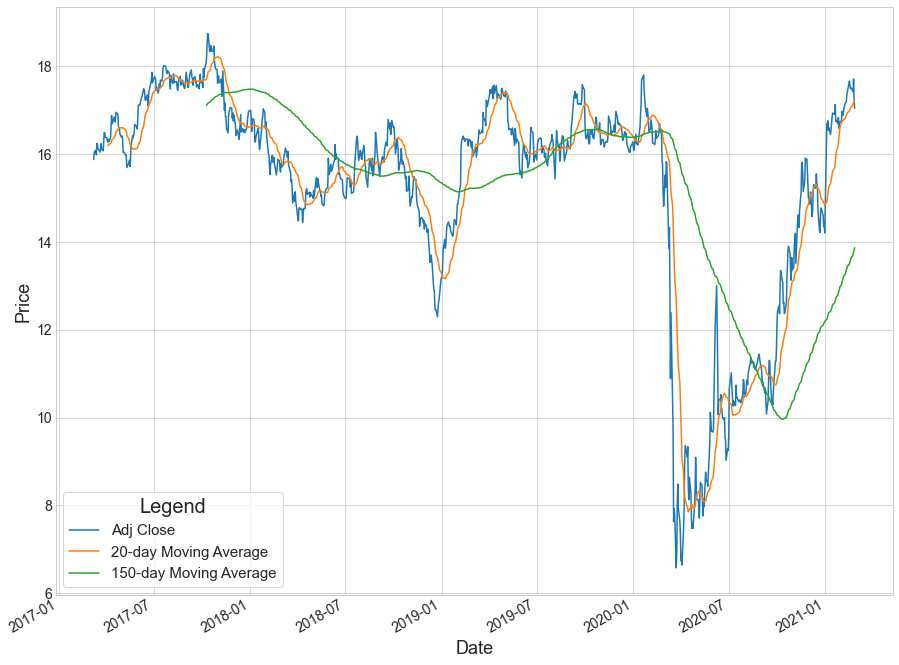

In [105]:
moving_avg_analysis("bpy", 150)